In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from sklearn.decomposition import PCA
from salishsea_tools import viz_tools
import sys

In [2]:
rivers_list = list(['Nisqually', 'Nanaimo', 'Elwha', 'Cowichan', 'Stillaguamish', 'Puyallup', 'Campbell', 'Nooksack', 'Squamish', 'Snohomish', 'Skagit', 'Homathko', 'Salmon'])

puget_rivers = list(['NisquallyMcAllister', 'Puyallup'])
evi_s_rivers = list(['Nanaimo1', 'Nanaimo2', 'NorNanaimo', 'Cowichan1', 'Cowichan2'])
evi_n_rivers = list(['SalmonSayward'])
jdf_rivers = list(['Elwha'])
fraser_rivers = list(['LittleCampbell', 'Nooksack', 'NooksackW', 'NooksackE'])
skagit_rivers = list(['Stillaguamish1', 'Stillaguamish2', 'Stillaguamish3','SnohomishAllenQuilceda','Skagit1','Skagit2'])
howe_rivers = list(['Squamish'])
bute_rivers = list(['Homathko'])

In [3]:
bathy = xr.open_dataset('../../../../MEOPAR/grid/bathymetry_202108.nc')

In [4]:
sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import river_202108 as rivers
# rivers.prop_dict['howe']['Squamish']['i']


In [5]:
runoff = xr.open_dataset('../../../../../../results/forcing/rivers/R201702DFraCElse_y2023m01d19.nc')

In [7]:
# imin, imax = 0, 898
# jmin, jmax = 0, 394
# jj = range(jmax)
# ii = range(imax)
# jjm, iim = np.meshgrid(jj, ii)
# fig, ax = plt.subplots(1, 1, figsize=(4, 9))
# ax.contourf(bathy.Bathymetry[imin:imax, jmin:jmax], cmap='winter_r')
# ax.scatter(jjm[runoff[:, :jmax]>0], iim[runoff[:, :jmax]>0], 
#            s=runoff[:, :jmax][runoff[:, :jmax]>0]*1000, color='tab:red');

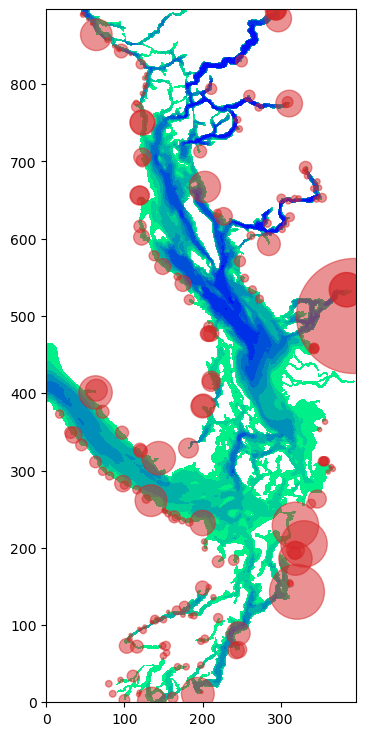

In [11]:
imin, imax = 0, 898
jmin, jmax = 0, 398
jj = range(jmax)
ii = range(imax)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(4, 9))
ax.contourf(bathy.Bathymetry[:, :jmax], cmap='winter_r')
      
ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='tab:red',alpha=0.5)